In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown --id 1RmX5_q6D7rzoXD7nPUM_s8rKEf1KVMDi #training_text.zip download
!gdown --id 1bSQrw5WmDqqI8hBcr8Pflzatx4xCT0Ex #training_variants.zip download

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1RmX5_q6D7rzoXD7nPUM_s8rKEf1KVMDi
From (redirected): https://drive.google.com/uc?id=1RmX5_q6D7rzoXD7nPUM_s8rKEf1KVMDi&confirm=t&uuid=490695d6-24ec-4212-a40e-6e3af0a66090
To: /content/training_text.zip
100% 63.9M/63.9M [00:03<00:00, 17.7MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bSQrw5WmDqqI8hBcr8Pflzatx4xCT0Ex
To: /content/training_variants.zip
100% 24.8k/24.8k [00:00<00:00, 51.1MB/s]


In [ ]:
!unzip training_text.zip

Archive:  training_text.zip
  inflating: training_text           


In [ ]:
!unzip training_variants.zip

Archive:  training_variants.zip
  inflating: training_variants       


In [ ]:
data = pd.read_csv('training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [ ]:
# note the seprator in this file
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

# loading stop words from nltk library
from nltk.corpus import stopwords
import re
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()

        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "

        data_text[column][index] = string

In [ ]:
# There are nan values in the following index
for index1,row1 in data_text.iterrows():
  if type(row1["TEXT"]) == str:
    nlp_preprocessing(row1["TEXT"],index1,"TEXT")
  else:
    print("There is no text description for id:",index1)

There is no text description for id: 1109
There is no text description for id: 1277
There is no text description for id: 1407
There is no text description for id: 1639
There is no text description for id: 2755


In [ ]:
result = pd.merge(data, data_text, on="ID", how="left")
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [ ]:
for i in range(len(result["TEXT"])):
  if type(result["TEXT"][i]) != str:
    result["TEXT"][i] = result["Gene"][i] + " " + result["Variation"][i]
# replacing NaN values with Gene and Variation

In [ ]:
result.isnull().sum() # No null values

,0
ID,0
Gene,0
Variation,0
Class,0
TEXT,0


**Train Test Split**

In [ ]:
X=result.drop("Class",axis=1)
Y= result["Class"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X,Y,stratify=Y,test_size=0.2,random_state=2)
X_train, X_val, Y_train, Y_val = train_test_split(x_train,y_train,stratify=y_train,test_size=0.25,random_state=2)

In [ ]:
# Training data set
print(X_train.shape , Y_train.shape)
print(X_val.shape, Y_val.shape)
print(x_test.shape, y_test.shape)

(1992, 4) (1992,)
(664, 4) (664,)
(665, 4) (665,)


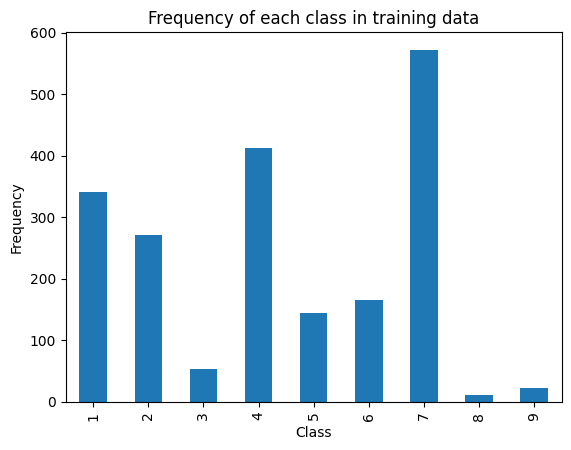

------------------------------------------------------------------------------------------------------------------------


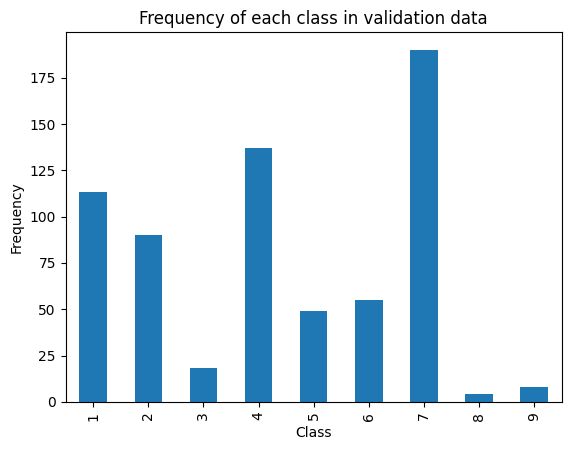

------------------------------------------------------------------------------------------------------------------------


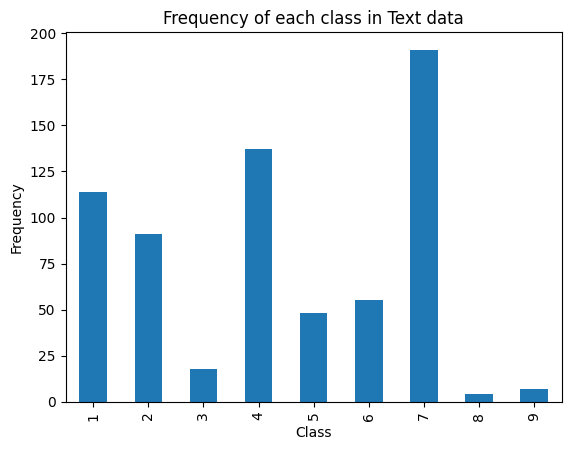

------------------------------------------------------------------------------------------------------------------------


In [ ]:
Y_train.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Frequency of each class in training data")
plt.show()
print("---"*40)
Y_val.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Frequency of each class in validation data")
plt.show()
print("---"*40)
y_test.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Frequency of each class in Text data")
plt.show()
print("---"*40)

**Prediction Using Random Model**

In [ ]:
# Ploting
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(test_y, predict_y):
  C= confusion_matrix(test_y, predict_y)
  precision = ((C.T)/C.sum(axis=1)).T
  recall = (C/C.sum(axis=0))
  labels=[1,2,3,4,5,6,7,8,9]
  print("-"*40,"confusion_matrix","-"*40)
  plt.figure(figsize=(20,7))
  sns.heatmap(C,annot=True,cmap="YlGnBu",fmt=".3f",xticklabels=labels, yticklabels= labels)
  plt.xlabel("Predicted Class")
  plt.ylabel("Actual class")
  plt.show()
  print("-"*40,"Precision","-"*40)
  plt.figure(figsize=(20,7))
  sns.heatmap(precision,annot=True,cmap="YlGnBu",fmt=".3f",xticklabels=labels, yticklabels= labels)
  plt.xlabel("Predicted Class")
  plt.ylabel("Actual class")
  plt.show()
  print("-"*40,"Recall","-"*40)
  plt.figure(figsize=(20,7))
  sns.heatmap(recall,annot=True,cmap="YlGnBu",fmt=".3f",xticklabels=labels, yticklabels= labels)
  plt.xlabel("Predicted Class")
  plt.ylabel("Actual class")
  plt.show()

In [ ]:
# we need to genereate 9 values row sum to 1
# randomly generate 9 values and divide by row sum
cv_val = np.zeros((len(Y_val),9))
for i in range(len(Y_val)):
  random_nums = np.random.rand(1,9)
  random_nums =random_nums/np.sum(random_nums)
  cv_val[i] = random_nums

In [ ]:
from sklearn.metrics import log_loss
pred_y_cv = np.argmax(cv_val,axis=1)

In [ ]:
pred_y_cv=pred_y_cv+1

---------------------------------------- confusion_matrix ----------------------------------------


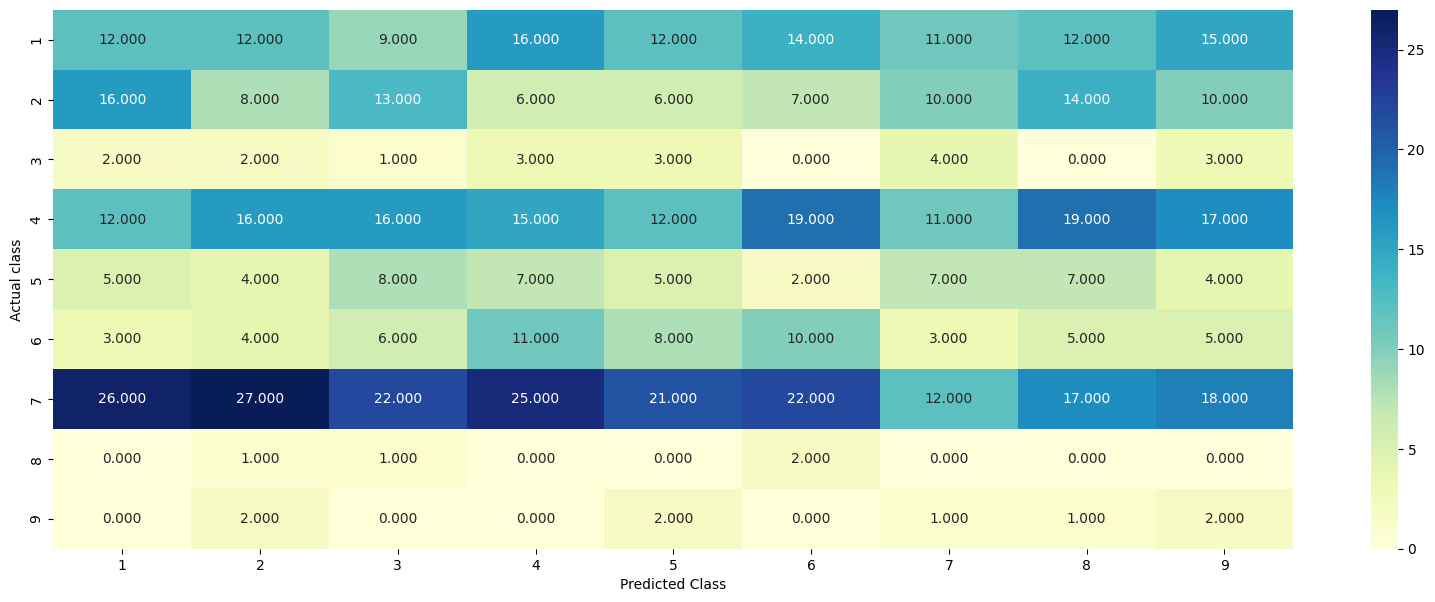

---------------------------------------- Precision ----------------------------------------


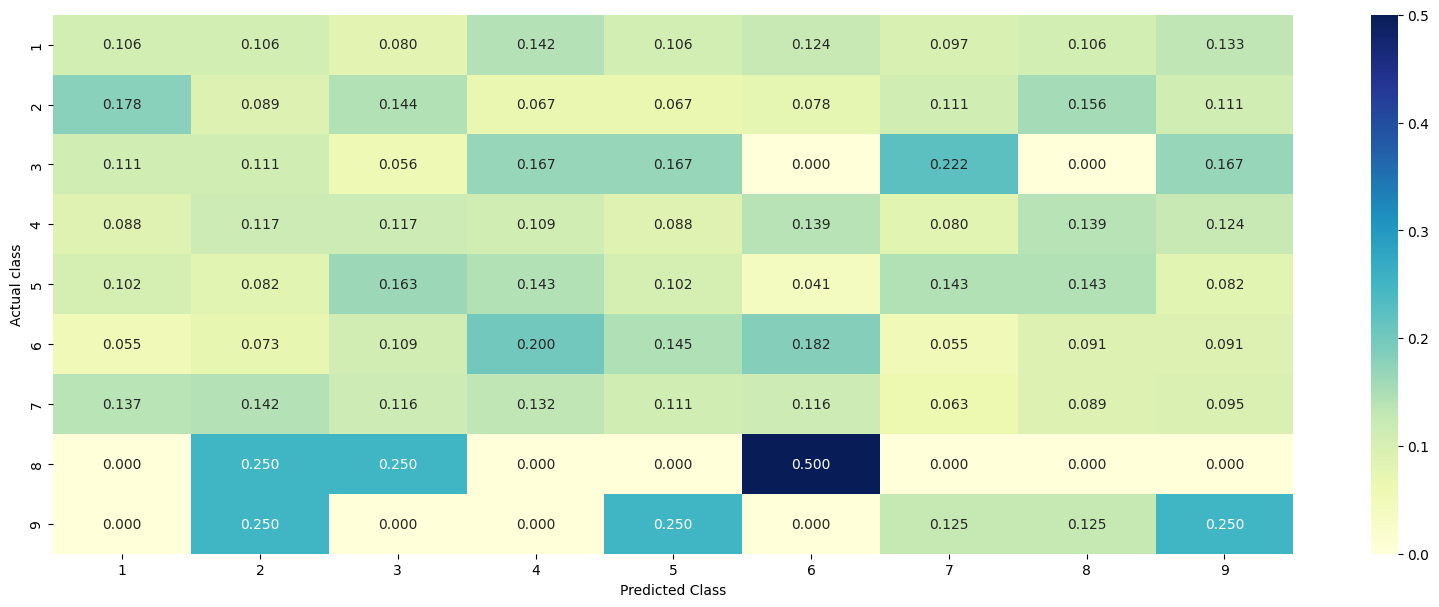

---------------------------------------- Recall ----------------------------------------


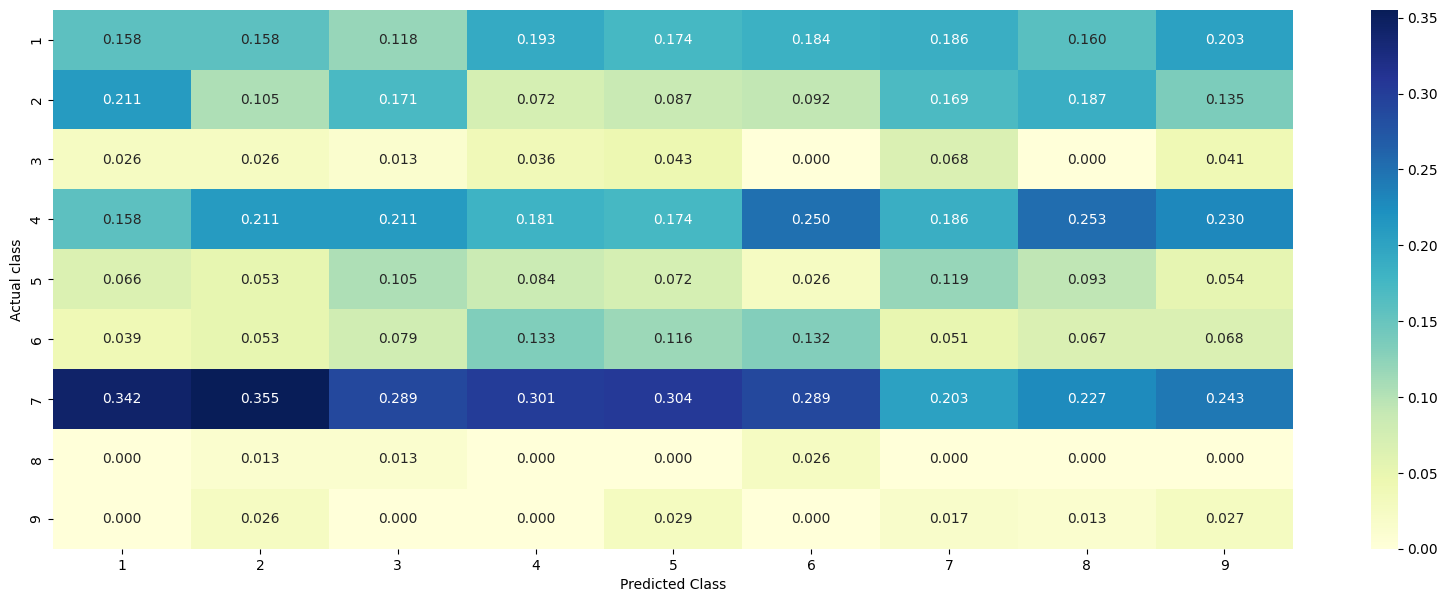

In [ ]:
plot_confusion_matrix(Y_val,pred_y_cv)

In [ ]:
log_loss(Y_val,cv_val)
# Log loss of a random model
# Any resonable model should have log loss less than this

2.5131306564620206

**Univariate Analysis**

In [ ]:
print("Total number of unique Genes:",len(result["Gene"].value_counts()))
unique_Genes=result["Gene"].value_counts()
unique_Genes.head(10)

Total number of unique Genes: 264


,count
Gene,
BRCA1,264
TP53,163
EGFR,141
PTEN,126
BRCA2,125
KIT,99
BRAF,93
ALK,69
ERBB2,69


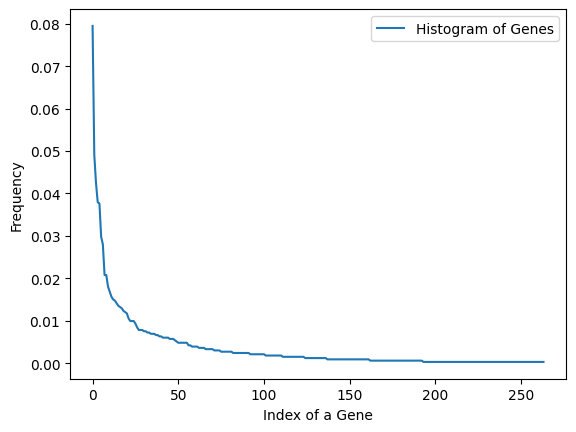

In [ ]:
s=sum(unique_Genes.values)
h = unique_Genes.values/s
plt.plot(h,label="Histogram of Genes")
plt.xlabel("Index of a Gene")
plt.ylabel("Frequency")
plt.legend()
plt.show()
# first 50 genes covers the maximum frequency

**Feature Engineering**

**Response Coding**

In [ ]:
# Response Coding with Laplace Smooting
def get_gv_fea_dict(alpha, feature, df):
    value_count = result[feature].value_counts()
    gv_dict = dict()
    for i, denominator in value_count.items():
        vec = []
        for k in range(1, 10):
            cls_cnt = result[(result["Class"] == k) & (result[feature] == i)]
            vec.append((cls_cnt.shape[0] + alpha * 10) / (denominator + 90 * alpha))
        gv_dict[i] = vec
    return gv_dict

# Get Gene Variation Feature
def get_gv_fea_feature(alpha, feature, df):
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    value_count = result[feature].value_counts()
    gv_fea = []
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9] * 9)  # default probability vector
    return gv_fea



In [ ]:
X_train.shape

(1992, 4)

In [ ]:
alpha=1
train_gene_responcecoding = np.array(get_gv_fea_feature(alpha,"Gene",X_train))
val_gene_responcecoding = np.array(get_gv_fea_feature(alpha,"Gene",X_val))
test_gene_responcecoding = np.array(get_gv_fea_feature(alpha,"Gene",x_test))

**One Hot Encoding**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
gene_vectorizer =CountVectorizer()
train_gene_vectorizer = gene_vectorizer.fit_transform(X_train["Gene"])
val_gene_vectorizer = gene_vectorizer.transform(X_val["Gene"])
test_gene_vectorizer = gene_vectorizer.transform(x_test["Gene"])

In [ ]:
type(train_gene_vectorizer)

scipy.sparse._csr.csr_matrix

**How good Gene Feature is in predicting yi ?**

In [ ]:
# Lest buid a logistic regression to know that

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
alpha = [10**x for x in range(-5,1)]
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
cv_loss= []
for i in alpha:
  clf = SGDClassifier(alpha=i, loss="log_loss", random_state=42)
  clf.fit(train_gene_vectorizer,Y_train)
  sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
  sig_clf.fit(train_gene_vectorizer,Y_train)
  pred_y = sig_clf.predict_proba(val_gene_vectorizer)
  cv_loss.append(log_loss(Y_val,pred_y))
  print("for Alpha =",i,"log loss is",log_loss(Y_val,pred_y))

for Alpha = 1e-05 log loss is 1.2281681903718842
for Alpha = 0.0001 log loss is 1.1969102846887125
for Alpha = 0.001 log loss is 1.231267165384117
for Alpha = 0.01 log loss is 1.3429100235884774
for Alpha = 0.1 log loss is 1.4526898352206807
for Alpha = 1 log loss is 1.4865644607082296


log loss 1.48 is considerably less than log loss of random model i.e. 2.52 so gene feature is very much use full in predicting the class labels

**How good Variation Feature is in predicting yi ?**

In [ ]:
# Response Coding
alpha=1
train_Variation_responcecoding = np.array(get_gv_fea_feature(alpha,"Variation",X_train))
val_Variation_responcecoding = np.array(get_gv_fea_feature(alpha,"Variation",X_val))
test_Variation_responcecoding = np.array(get_gv_fea_feature(alpha,"Variation",x_test))

In [ ]:
# One Hot Encoding
Variation_vectorizer =CountVectorizer()
train_Variation_vectorizer = Variation_vectorizer.fit_transform(X_train["Variation"])
val_Variation_vectorizer = Variation_vectorizer.transform(X_val["Variation"])
test_Variation_vectorizer = Variation_vectorizer.transform(x_test["Variation"])

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
alpha = [10**x for x in range(-5,1)]
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
cv_loss= []
for i in alpha:
  clf = SGDClassifier(alpha=i, loss="log_loss", random_state=42)
  clf.fit(train_Variation_vectorizer,Y_train)
  sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
  sig_clf.fit(train_Variation_vectorizer,Y_train)
  pred_y = sig_clf.predict_proba(val_Variation_vectorizer)
  cv_loss.append(log_loss(Y_val,pred_y))
  print("for Alpha =",i,"log loss is",log_loss(Y_val,pred_y))

for Alpha = 1e-05 log loss is 1.6848644124580152
for Alpha = 0.0001 log loss is 1.672631381878217
for Alpha = 0.001 log loss is 1.6801219230028135
for Alpha = 0.01 log loss is 1.6951856068536555
for Alpha = 0.1 log loss is 1.715952014325372
for Alpha = 1 log loss is 1.7166221234797419


:log loss 1.71 is considerably less than log loss of random model i.e. 2.52 so Varitation feature is very much use full in predicting the class labels

**How good Text Feature is in predicting yi ?**

In [ ]:
def extract_features(cls_text):
  dictionary= nltk.defaultdict(int)
  for index, row in cls_text.iterrows():
    for word in row["TEXT"].split():
      if word in dictionary:
        dictionary[word] += 1
      else:
        dictionary[word] = 1
  return dictionary

In [ ]:
import math
def get_text_responsecoding(df):
  text_feature_responsecoding = np.zeros((df.shape[0],9))
  for i in range(9):
    row_index=0
    for index, row in df.iterrows():
      sum_prob=0
      for word in row["TEXT"].split():
        sum_prob+=math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
        text_feature_responsecoding[row_index][i]=math.exp(sum_prob/len(row["TEXT"].split()))
      row_index+=1
  return text_feature_responsecoding


In [ ]:
dict_list=[]
for i in range(1,10):
  cls_text= x_train[result["Class"]==i]
  dict_list.append(extract_features(cls_text))

total_dict = extract_features(result)

In [ ]:
text_vectorizer = CountVectorizer(min_df=3)
train_text_onehot= text_vectorizer.fit_transform(X_train["TEXT"])
val_text_onehot= text_vectorizer.transform(X_val["TEXT"])
test_text_onehot= text_vectorizer.transform(x_test["TEXT"])

In [ ]:
train_text_onehot[0].shape

(1, 51438)

In [ ]:
# Training Logistic Regression + Calibration model using text features
alpha = [10**x for x in range(-1,5)]
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
cv_loss= []
for i in alpha:
  clf= SGDClassifier(alpha=i, loss="log_loss", penalty="l2",random_state=42)
  clf.fit(train_text_onehot,Y_train)

  sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
  sig_clf.fit(train_text_onehot,Y_train)
  pred_y = sig_clf.predict_proba(val_text_onehot)
  cv_loss.append(log_loss(Y_val,pred_y))
  print("for Alpha =",i,"log loss is",log_loss(Y_val,pred_y))

for Alpha = 0.1 log loss is 1.3325063078765598
for Alpha = 1 log loss is 1.2294633456453796
for Alpha = 10 log loss is 1.191085358478823
for Alpha = 100 log loss is 1.3036013001484499
for Alpha = 1000 log loss is 1.5575244480942583
for Alpha = 10000 log loss is 1.7549846369774726


log loss 1.75 is considerably less than log loss of random model i.e. 2.5 so Text feature is very much use full in predicting the class labels

**Stacking up for modeling**

In [ ]:
train_text_onehot = train_text_onehot.toarray()
train_Variation_vectorizer =train_Variation_vectorizer.toarray()
train_gene_vectorizer = train_gene_vectorizer.toarray()

In [ ]:
final_feature_onehot_train= np.hstack((train_gene_vectorizer,train_Variation_vectorizer,train_text_onehot))

In [ ]:
val_gene_vectorizer = val_gene_vectorizer.toarray()
val_Variation_vectorizer =val_Variation_vectorizer.toarray()
val_text_onehot = val_text_onehot.toarray()

In [ ]:
final_feature_onehot_val = np.hstack((val_gene_vectorizer,val_Variation_vectorizer,val_text_onehot))

In [ ]:
test_gene_vectorizer = test_gene_vectorizer.toarray()
test_Variation_vectorizer =test_Variation_vectorizer.toarray()
test_text_onehot = test_text_onehot.toarray()

In [ ]:
final_feature_onehot_test = np.hstack((test_gene_vectorizer,test_Variation_vectorizer,test_text_onehot))

**Base Line Model Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
alpha= [10**x for x in range(-5,1)]
for i in alpha:
  clf= MultinomialNB(alpha=i)
  clf.fit(final_feature_onehot_train,Y_train)
  sig_clf = CalibratedClassifierCV(clf,method="sigmoid")
  sig_clf.fit(final_feature_onehot_train,Y_train)
  pred_y = sig_clf.predict_proba(final_feature_onehot_val)
  print("for Alpha =",i,"log loss is",log_loss(Y_val,pred_y))


for Alpha = 1e-05 log loss is 1.3148349667730233
for Alpha = 0.0001 log loss is 1.305671313636848
for Alpha = 0.001 log loss is 1.3114418519333895
for Alpha = 0.01 log loss is 1.3183193922019034
for Alpha = 0.1 log loss is 1.327209115481707
for Alpha = 1 log loss is 1.3243315703613456


for Alpha = 0.0001 log loss is 1.3056713136368527 is the best log loss

In [ ]:
from sklearn.naive_bayes import MultinomialNB
alpha= [10**x for x in range(-5,1)]
for i in alpha:
  clf= MultinomialNB(alpha=i)
  clf.fit(final_feature_onehot_train,Y_train)
  sig_clf = CalibratedClassifierCV(clf,method="sigmoid")
  sig_clf.fit(final_feature_onehot_train,Y_train)
  pred_y = sig_clf.predict_proba(final_feature_onehot_train)
  print("for Alpha =",i,"log loss is",log_loss(Y_train,pred_y))


for Alpha = 1e-05 log loss is 0.9530342277554711
for Alpha = 0.0001 log loss is 0.9639728875444018
for Alpha = 0.001 log loss is 0.9784443025570174
for Alpha = 0.01 log loss is 0.997006506454823
for Alpha = 0.1 log loss is 1.0283827193180204
for Alpha = 1 log loss is 1.0630824623468917


In [ ]:
from sklearn.naive_bayes import MultinomialNB
alpha= [10**x for x in range(-5,1)]
for i in alpha:
  clf= MultinomialNB(alpha=i)
  clf.fit(final_feature_onehot_train,Y_train)
  sig_clf = CalibratedClassifierCV(clf,method="sigmoid")
  sig_clf.fit(final_feature_onehot_train,Y_train)
  pred_y = sig_clf.predict_proba(final_feature_onehot_test)
  print("for Alpha =",i,"log loss is",log_loss(y_test,pred_y))


for Alpha = 1e-05 log loss is 1.2922701991433525
for Alpha = 0.0001 log loss is 1.2953490893015065
for Alpha = 0.001 log loss is 1.3031463418940619
for Alpha = 0.01 log loss is 1.3026110035616898
for Alpha = 0.1 log loss is 1.2957308927848472
for Alpha = 1 log loss is 1.303084174814494


**Log Loss of Naive Bayes at alpha= 0.0001**
1. Train -- 0.96
2. Test --- 1.29
3. Cv   --- 1.30

Test and Cv Logloss is close so model has generalized well.

**Confusion Matrix**

---------------------------------------- confusion_matrix ----------------------------------------


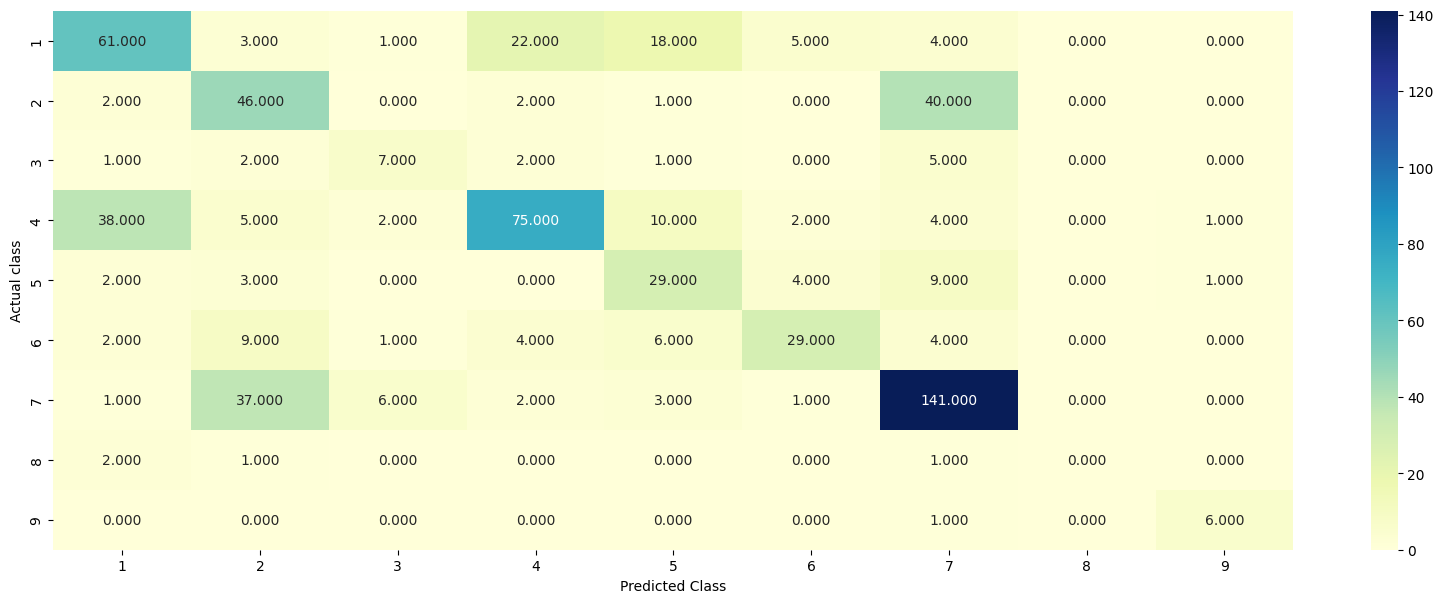

---------------------------------------- Precision ----------------------------------------


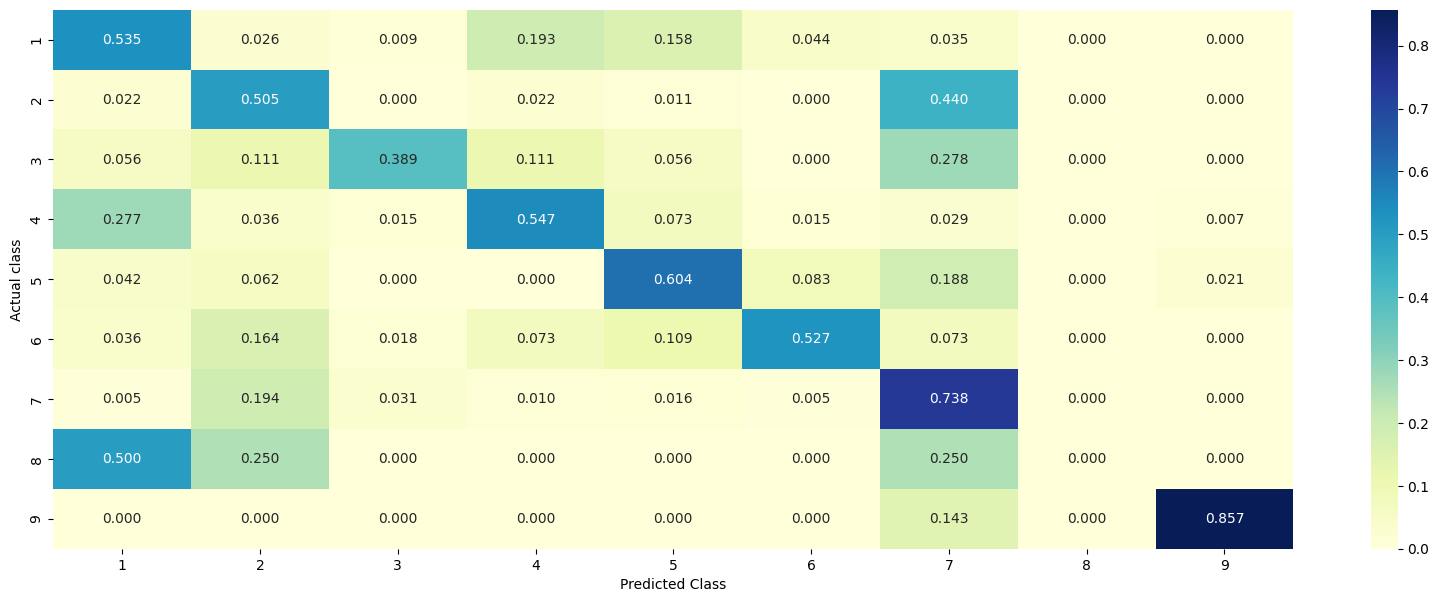

---------------------------------------- Recall ----------------------------------------


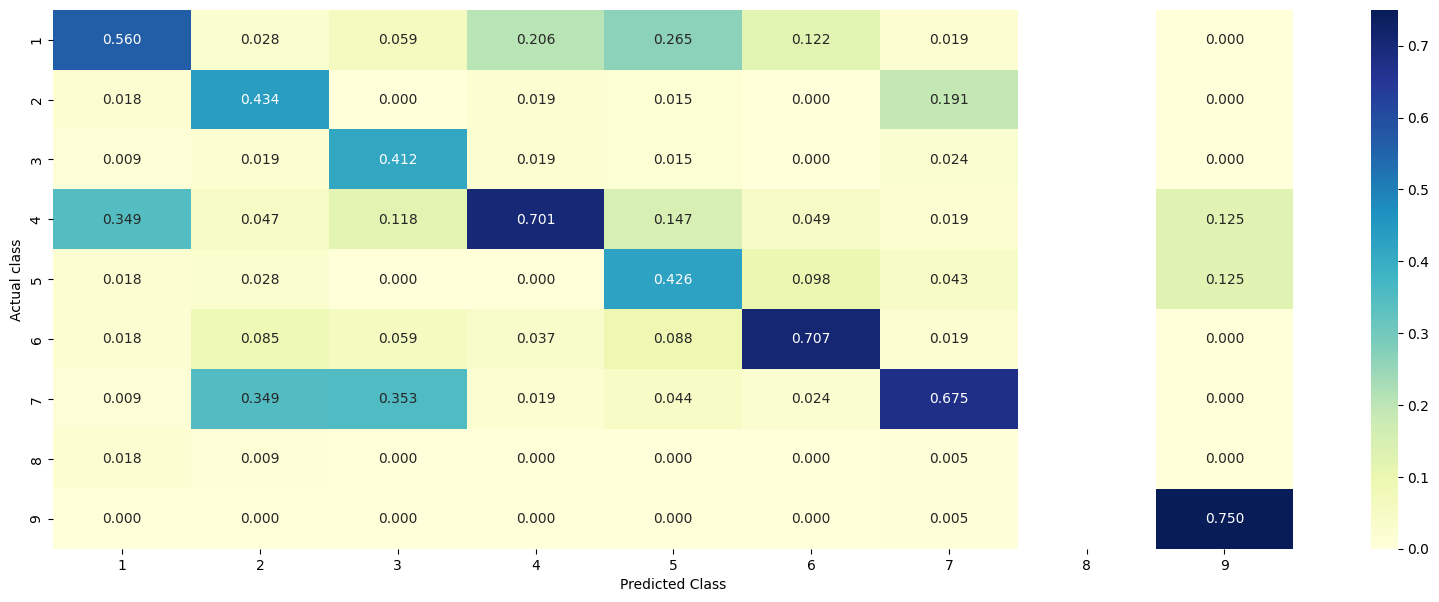

In [ ]:
plot_confusion_matrix(y_test,pred_y.argmax(axis=1)+1)

**Logistic Regression**

In [ ]:
alpha= [10**x for x in range(-5,1)]
for i in alpha:
  clf = SGDClassifier(alpha=i, loss="log_loss", random_state=42)
  clf.fit(final_feature_onehot_train,Y_train)
  sig_clf = CalibratedClassifierCV(clf,method="sigmoid")
  sig_clf.fit(final_feature_onehot_train,Y_train)
  pred_y = sig_clf.predict_proba(final_feature_onehot_val)
  print("for Alpha =",i,"log loss is",log_loss(Y_val,pred_y))


for Alpha = 1e-05 log loss is 1.328009056834877
for Alpha = 0.0001 log loss is 1.3423084303416677
for Alpha = 0.001 log loss is 1.347531772391132
for Alpha = 0.01 log loss is 1.322425302615035
for Alpha = 0.1 log loss is 1.321309003557504
for Alpha = 1 log loss is 1.2260573641939616


---------------------------------------- confusion_matrix ----------------------------------------


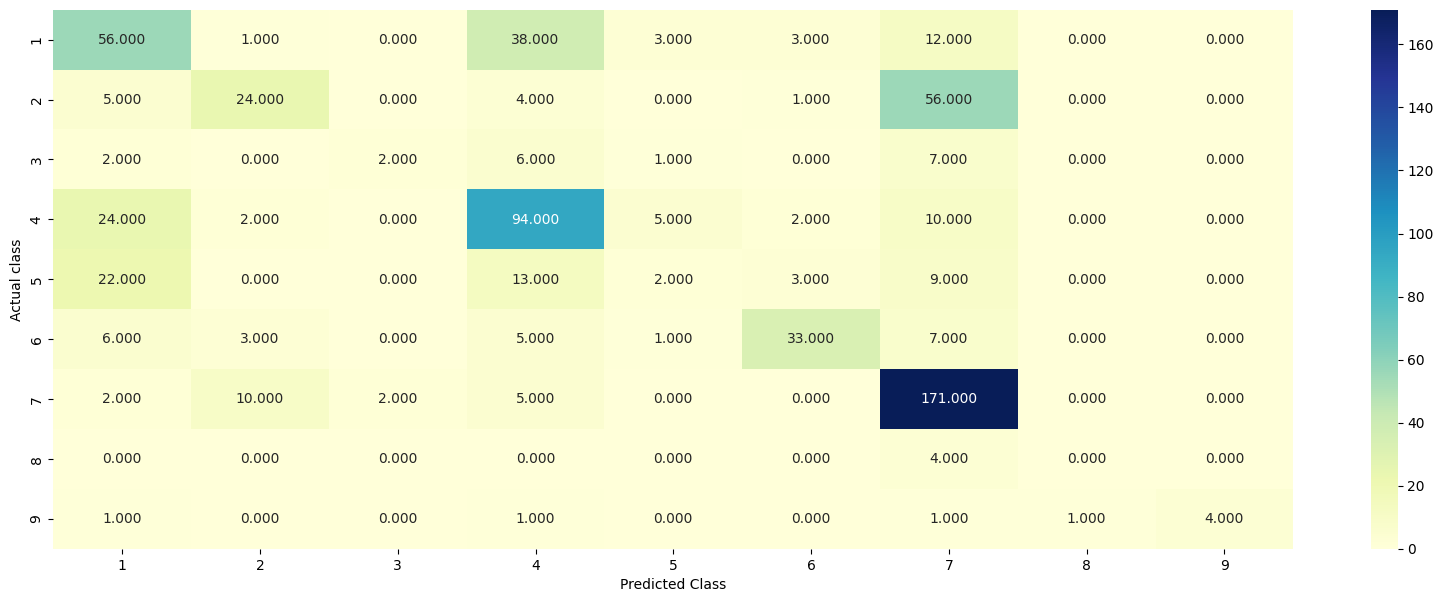

---------------------------------------- Precision ----------------------------------------


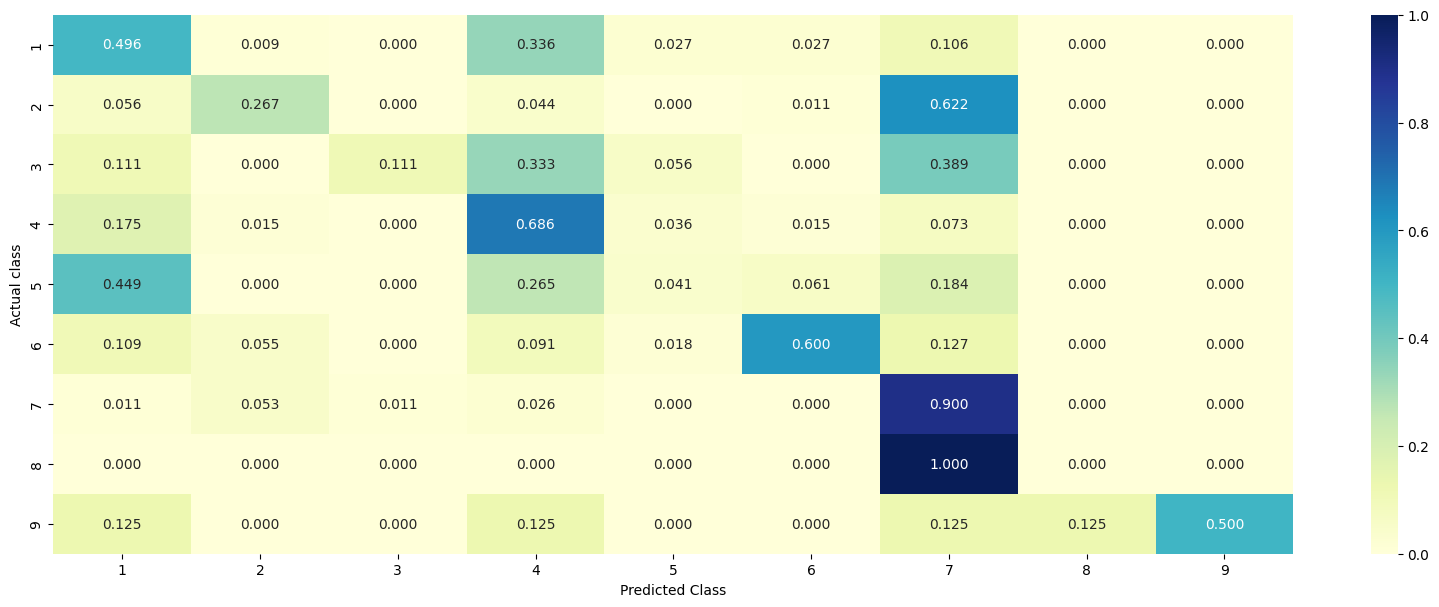

---------------------------------------- Recall ----------------------------------------


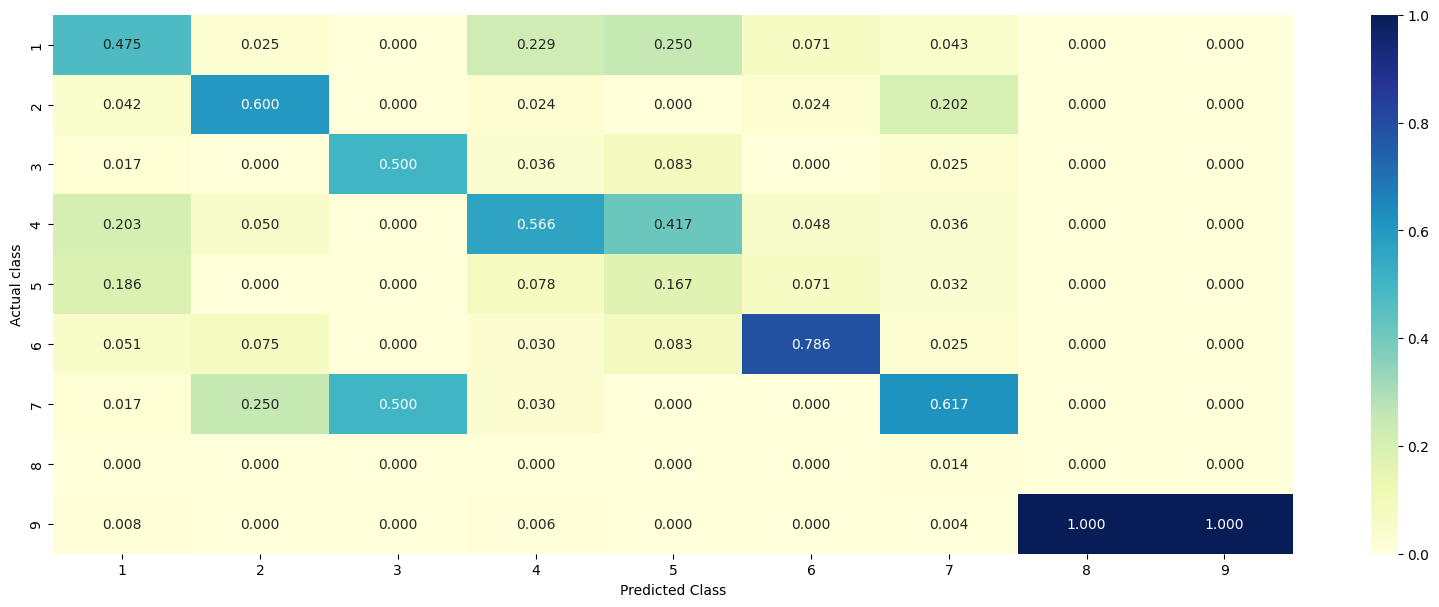

In [ ]:
plot_confusion_matrix(Y_val,pred_y.argmax(axis=1)+1)